In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


ModuleNotFoundError: No module named 'numpy'

In [9]:
x1 = [4, 5, 10, 4, 3, 11, 14 , 8, 10, 12]
x2 = [21, 19, 24, 17, 16, 25, 24, 22, 21, 21]
classes = [0, 0, 1, 0, 0, 1, 1, 0, 1, 1]

plt.scatter(x1, x2, c=classes)
plt.show()

NameError: name 'plt' is not defined

In [10]:
new_x1 = 8
new_x2 = 21
new_point = [(new_x1, new_x2)]


plt.scatter(x1 + [new_x1], x2 + [new_x2], c=classes + [1])


plt.show()

NameError: name 'plt' is not defined

In [16]:
X = np.column_stack((x1, x2))  # Combining x1 and x2 into a 2D array
y = np.array(classes)

In [17]:
def most_common(lst):
    return max(set(lst), key=lst.count)

def euclidean(point, data):
    # Euclidean distance between point and each row in data
    return np.sqrt(np.sum((point - data) ** 2, axis=1))


In [18]:
class KNeighborsClassifier:
    def __init__(self, k=5, dist_metric=euclidean):
        self.k = k
        self.dist_metric = dist_metric

    def fit(self, X_train, y_train):
        self.X_train = X_train
        self.y_train = y_train

    def predict(self, X_test):
        neighbors = []
        for x in X_test:
            distances = self.dist_metric(x, self.X_train)
            y_sorted = [y for _, y in sorted(zip(distances, self.y_train))]
            neighbors.append(y_sorted[:self.k])
        return list(map(most_common, neighbors))

    def evaluate(self, X_test, y_test):
        y_pred = np.array(self.predict(X_test))  # Convert predictions to an array
        accuracy = np.sum(y_pred == y_test) / len(y_test)
        return accuracy


In [19]:
# Split data into train & test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Standardize the data (scaling)
ss = StandardScaler().fit(X_train)
X_train = ss.transform(X_train)
X_test = ss.transform(X_test)

In [23]:
# Test KNN model across varying k values
accuracies = []
ks = range(3, 30)

for k in ks:
    knn = KNeighborsClassifier(k=k)
    knn.fit(X_train, y_train)
    accuracy = knn.evaluate(X_test, y_test)
    accuracies.append(accuracy)


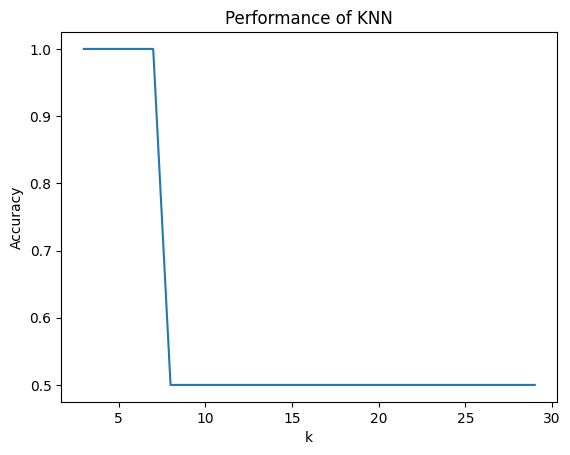

In [24]:
# Visualize accuracy vs. k
fig, ax = plt.subplots()
ax.plot(ks, accuracies)
ax.set(xlabel="k", ylabel="Accuracy", title="Performance of KNN")
plt.show()


In [26]:
# Find the best k
best_k = ks[np.argmax(accuracies)]
print(f"Best k: {best_k}")


Best k: 3


In [27]:
knn_best = KNeighborsClassifier(k=best_k)
knn_best.fit(X_train, y_train)

# New point to predict
new_x1 = 8
new_x2 = 21
new_point = [(new_x1, new_x2)]

# Standardize the new point using the same scaler (fit on the training set)
new_point_scaled = ss.transform(new_point)

# Predict the class for the new point using the best k
predicted_class = knn_best.predict(new_point_scaled)[0]  # Only one new point, so we take the first prediction
print(f"Predicted class for the new point ({new_x1}, {new_x2}): {predicted_class}")



Predicted class for the new point (8, 21): 0


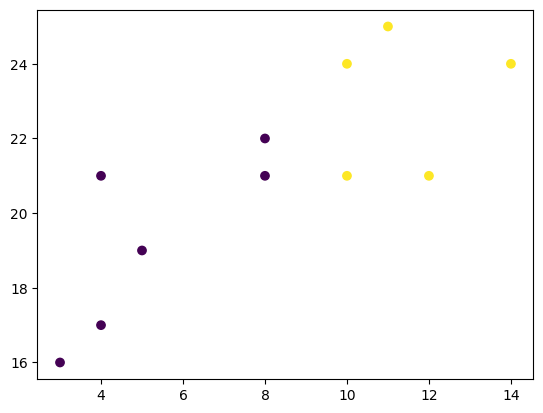

In [28]:
new_x1 = 8
new_x2 = 21
new_point = [(new_x1, new_x2)]


plt.scatter(x1 + [new_x1], x2 + [new_x2], c=classes + [predicted_class])


plt.show()